# Poisson Regression

### Part (a)

\begin{align*}
    p(y; \lambda) &= \frac{e^{\lambda} \ \lambda^{y}}{y!}
    &= \frac{1}{y!} \ exp(-\lambda + y \ \log \lambda)
    &= b(y) \ exp(T(y) \eta - a(\eta))
\end{align*}

So...

\begin{align*}
    b(y) &= \frac{1}{y!} \\
    T(y) &= y \\
    \eta &= \log \lambda \Rightarrow \lambda = e^{\eta} \\
    a(\eta) &= \lambda = e^{\eta}
\end{align*}

### Part (b)
##### Canonical Response Function

\begin{align*}
    \mathcal{h}_{\theta} (x) &= E[y \ \vert \ x ; \theta] \\
    &= \lambda \\
    &= e^{\eta} \\
    &= e^{\theta^T x}
\end{align*}

### Part (c)

\begin{align*}
    \mathcal{l} (\theta) &= \log p(y^{(i)} \ \vert \ x^{(i)}; \theta) \\
    &= \log \frac{e^{-\lambda} \ \lambda^{y}}{y!} \\
    &= -e^{\eta} + \eta y^{(i)} - \log y! \\
    &= -e^{\theta^T x^{(i)}} + \theta^T x^{(i)} y^{(i)} - \log y! \\
\end{align*}
Let's take derivitate respect to $\theta_j$
\begin{align*}
    \frac{\partial}{\partial \theta_j} \mathcal{l} (\theta) &= \frac{\partial}{\partial \theta_j} -e^{\theta^T x^{(i)}} + \theta^T x^{(i)} y^{(i)} - \log y! \\
    &= -x_j^{(i)} e^{\theta^T x} + x_j^{(i)} \\
    &= (y^{(i)} - e^{\theta^T x^{(i)}}) x_j^{(i)}
\end{align*}
Learning update rule:
\begin{align*}
    \theta_j := \theta_j + \alpha \ (y^{(i)} - e^{\theta^T x^{(i)}}) x_j^{(i)}
\end{align*}

### Part (d)

In [1]:
import numpy as np
import src.util as util
import matplotlib.pyplot as plt
from src.linear_model import LinearModel

In [2]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def h(self, theta, x):
        return np.exp(x @ theta)


    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """        
        def update_value(theta, x, y):
            return self.step_size / m * (x.T @ (y - self.h(theta, x)))
            
        m, n = x.shape
        
        if self.theta is None:
            self.theta = np.zeros((n,))

        update = update_value(self.theta, x, y)
        
        while np.linalg.norm(update, 1) >= self.eps:
            self.theta += update
            update = update_value(self.theta, x, y)
        

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        return self.h(self.theta, x)

In [3]:
ds4_train_path = 'data/ds4_train.csv'
ds4_valid_path = 'data/ds4_train.csv'

In [4]:
x_train, y_train = util.load_dataset(ds4_train_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds4_valid_path, add_intercept=True)

In [5]:
poisson_model = PoissonRegression(step_size=2e-7)
poisson_model.fit(x_train, y_train)

In [6]:
poisson_model.theta

array([7.36648418, 3.93325538, 3.4332288 , 2.00011328, 4.40022962])

In [7]:
def plot(y_label, y_pred, title):
    plt.plot(y_label, 'go', label='label')
    plt.plot(y_pred, 'rx', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

In [8]:
y_pred_train = poisson_model.predict(x_train)

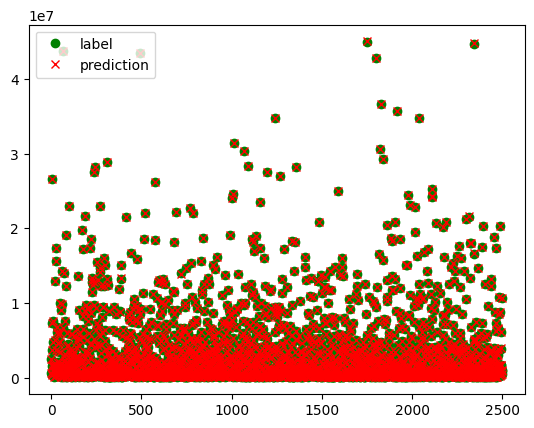

In [10]:
plot(y_train, y_pred_train, "")